E-tivity 1: Exploratory Data Analysis

A: Importing Modules and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:/Users/ajit.joy/Downloads/4168/Etivity1/bank.csv')

B: Quick Data Exploration

In [5]:
# Print first 5 rows of the dataframe
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no


In [6]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


We can see that the dataset has 1999 data rows, and both numerical and categorical attributes. The data rows are typically called observations or examples, and the columns are also called attributes or features.

B1: Quick examination of the numerical attributes

In [7]:
# Print statistical summary for all numerical attributes
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


There are a few inferences we can draw by looking at the output of `describe()`:

Age is 1988 which is 2 missing values

Please note that we can also get an idea of a possible skew in the data by comparing the mean to the median. The median of each numerical attribute is the 50% figure.
We can also examine the correlation matrix of all numerical attributes in the form of a heat map.

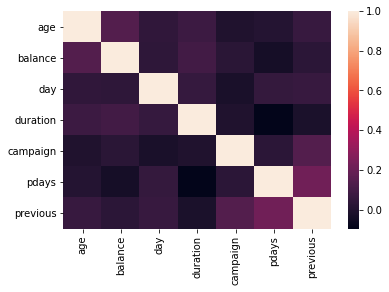

In [8]:
#correlation matrix
sns.heatmap(df.corr());

The heatmap suggests that the correlation is greater than 0 between pdays and previous.

We can further examine the pairwise distribution between age, balance, day and pdays a pair plot.

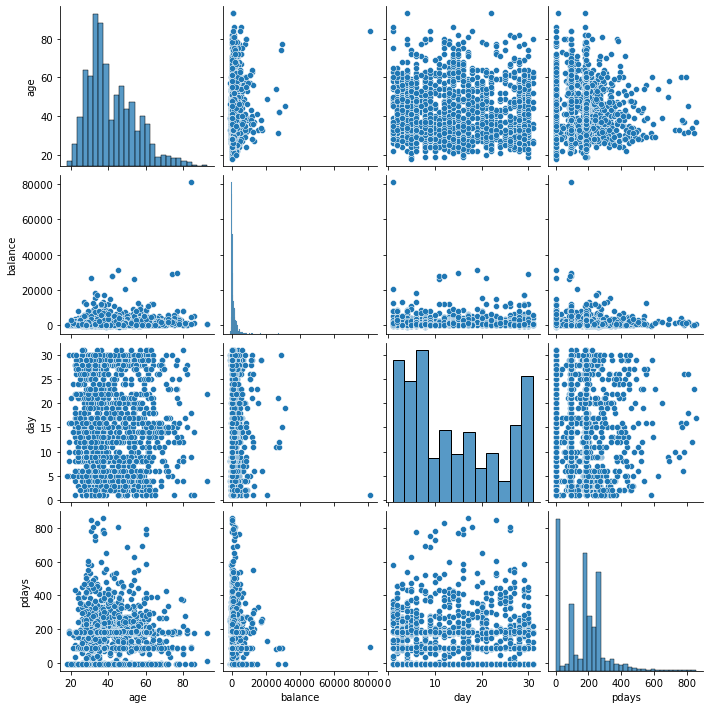

In [10]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=df[['age','balance','day','pdays']].dropna())
plt.show()

A pair plot can be overwhelming at first, but it can also let us quickly identify interesting trends which can be examined further.

B2: Quick Examination of Categorical Attributes

For the categorical (non-numerical) attributes (e.g. Marital, housing, loan, poutcome, etc.), we can look at the count of each value/category (i.e. a frequency table) to understand how well each category is represented in the dataset.

dfname['column_name'] is a basic indexing technique to acess a particular column of the dataframe.

For example, for attribute Maritial the frequency table can be printed by the command:

In [12]:
df['marital'].value_counts()

married     1111
single       674
divorced     215
Name: marital, dtype: int64

We can see that the married are almost double that of single and single is triple the amut of divorced.
We can also check the total count of values in column Gender with the command:

In [13]:
df['marital'].count()

2000

C: Now that we are familiar with the basic dataset characteristics, let's look closer at the distribution of some numerical attributes.

Let's take, for example, the numerical attributes balance and age.

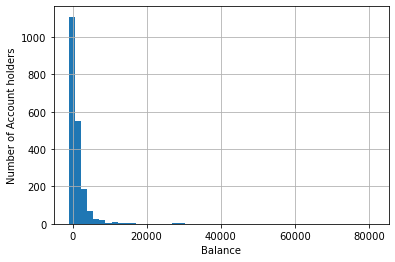

In [14]:
# Let's start by plotting a histogram of balance using the command:

df['balance'].hist(bins=50)
plt.xlabel('Balance')
plt.ylabel('Number of Account holders')
plt.show()

In the histogram above, we observe that there are few extreme values of balance. The use of 50 bins allows to depict the distribution clearly.

Next, we look at boxp lots to understand the distribution better.

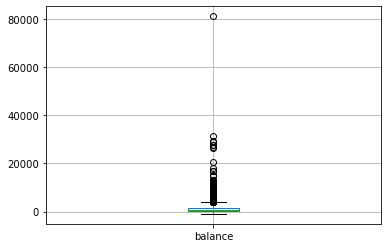

In [15]:
df.boxplot(column='balance')
plt.show()

 Let us segregate them by marital status.

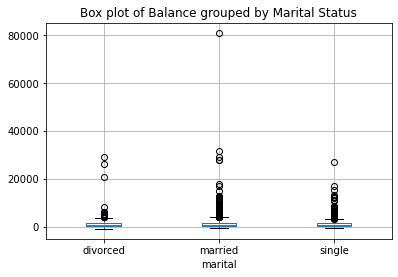

In [17]:
# Boxp lots of balance, grouped by the categorical attribute marital status
df.boxplot(column='balance', by='marital')
plt.title('Box plot of Balance grouped by Marital Status')
plt.suptitle("") # get rid of the automatic 'Box plot grouped by group_by_column_name' title
plt.show()

We can see that there is not much difference between balance of married and divorced though single have less balance compared to others.

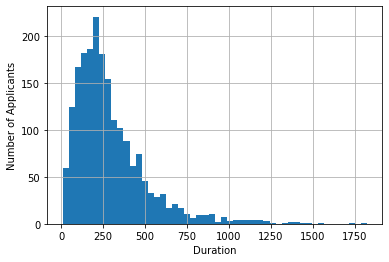

In [21]:
# Next, we examine a histogram of the numerical attribute Duration

df['duration'].hist(bins=50)
plt.xlabel("Duration")
plt.ylabel('Number of Applicants')
plt.show()

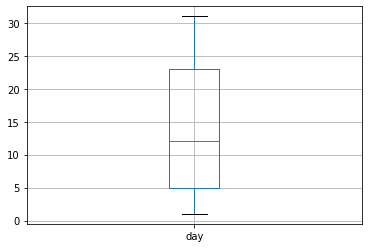

In [22]:
# Boxp lot of Day
df.boxplot(column='day')
plt.show()

Finally, let's examine the relationship between balance and pday with a scatter plot.

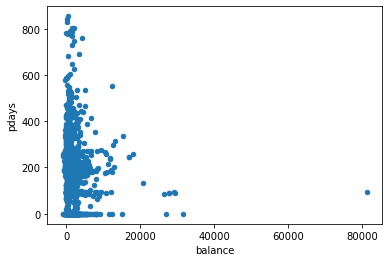

In [24]:
df.plot.scatter(x='balance', y='pdays')
plt.show()

Based on this scatter plot we can say that the number of pay days doesn't have any influence on the balance.
We can see the trend clearer with Seaborn's regplot, which draws a line that best fits the relation between two numeric attributes.

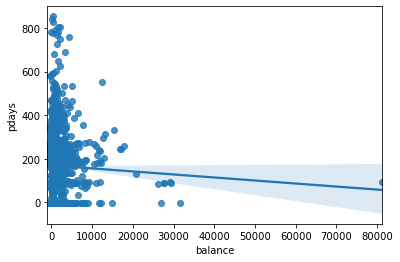

In [26]:
sns.regplot(data=df, x='balance', y='pdays')
plt.show()

This regplot suggests that typically that the number of pay days has no effect of the balance

D: Box Plot Variations

Next, we will use the Seaborn module to demonstrate a few variations or alternatives to box plots.

C:\Users\ajit.joy\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


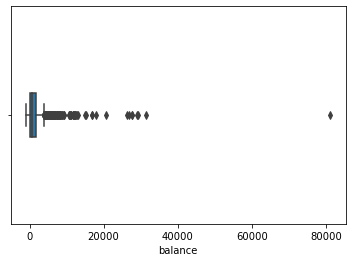

In [27]:
#First, let's draw a seaborn-style box plot for balance

sns.boxplot(x=df['balance'], orient='v', width=0.2)
plt.show()

C:\Users\ajit.joy\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


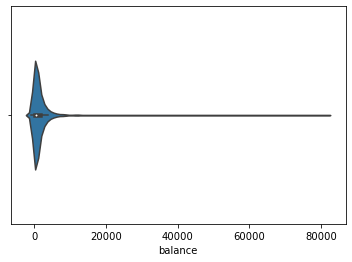

In [29]:
#Violin plot for balance

sns.violinplot(x=df['balance'], orient='v', width=0.5)
plt.show()

C:\Users\ajit.joy\Anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


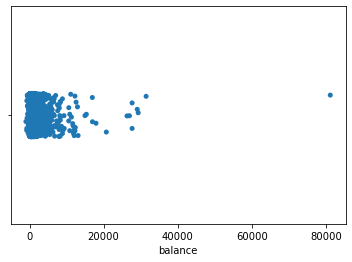

In [35]:
#Strip plot for balance

sns.stripplot(x=df['balance'], jitter=True, orient='v')
plt.show()

E: Distribution Analysis for Categorical Attributes

As noted above housing is rather a categorical attribute with two categories/values:

no - the applicant has no housng
yes - the applicant has a house
Let's look at the chances of getting a loan based on housing. That is, let's examine the relation between atributes housing and loan.

First, let's take a look at the frequency table for attribute housing:

In [36]:
frequency_table = df['housing'].value_counts(ascending=True)
print('Frequency Table for Housing:') 
print(frequency_table)

Frequency Table for Housing:
yes     963
no     1037
Name: housing, dtype: int64


Next, build a pivot table for Loan and housing, i.e. find the mean Loan for both housing=no and housing=yes.

In [41]:
pivot_table_LC = df.pivot_table(values='loan',
                                index='housing',
                                aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())

Here the values of Loan are grouped by the index housing, and the aggfunc is applied to each group. In the example above aggfunc is mean(), assuming the Yes and No values in column Loan are replaced by 1s and 0s, respectively.

In [42]:
# Print pivot table
print(pivot_table_LC)

             loan
housing          
no       0.077146
yes      0.176532


The pivot table can be interprted as follows. The probability for getting a loan is 0.077146 (i.e. ~8%) for applicants with no housing, and 0.176532 (i.e. ~17%) for applicants with a housing.

Let's plot housing and the probability of getting a loan based on housing.

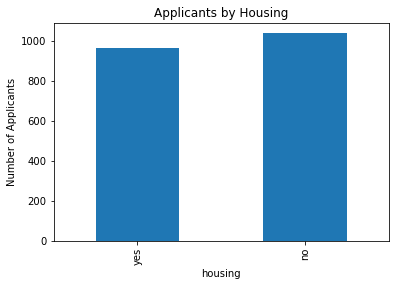

In [43]:
# Plot the frequency table for housing
frequency_table.plot(kind='bar')
plt.xlabel('housing')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Housing')
plt.show()

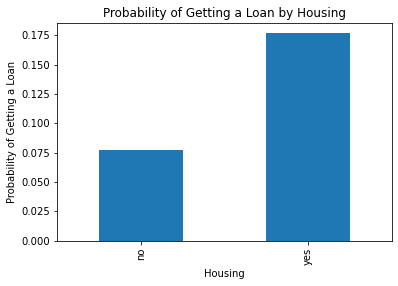

In [44]:
# Plot pivot table
pivot_table_LC.plot(kind='bar')
plt.xlabel('Housing')
plt.ylabel('Probability of Getting a Loan')
plt.title('Probability of Getting a Loan by Housing')
plt.legend().set_visible(False) # we don't need the default legend

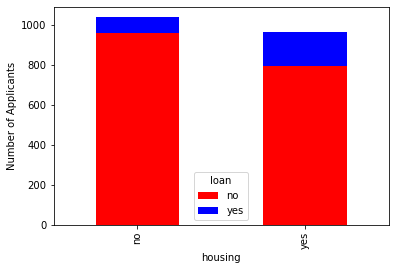

In [46]:
#Alternately, the two plots above can be combined in a stacked chart by plotting the output of with Pandas' crosstab() function:

crosstab_CL = pd.crosstab(df['housing'], df['loan'])
crosstab_CL.plot(kind='bar', stacked=True, color=['red', 'blue'])
plt.ylabel('Number of Applicants')
plt.show()

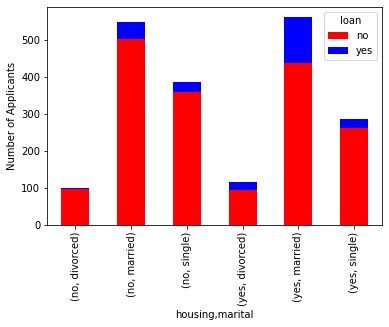

In [47]:
#Furthermore, we can stackchart Housing and Marital against Loan.

crosstab_CGL = pd.crosstab([df['housing'], df['marital']], df['loan'])
crosstab_CGL.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)
plt.ylabel('Number of Applicants')
plt.show()

From above we can understand is that the marital status doesn't play much role when getting loan approved.

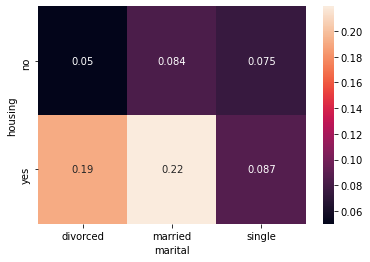

In [48]:
pivot_table_LCG = df.pivot_table(values='loan', 
                           index='housing', 
                           columns='marital',
                           aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean())
sns.heatmap(pivot_table_LCG, annot=True)
plt.show()

We can see from above that the married with housing are more likely to get a loan.